# Assignment 4
You have to replicate all the maps in this JN using folium.

In [2]:
## Creating Database
from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }a
</style>
"""))


In [13]:
import matplotlib.pyplot as plt 
#!pip install geopandas
import numpy as np
import pandas as pd
import geopandas as gpd
import folium as fm

In [4]:
# Get data of labor
sex_work = pd.read_stata( 'C:/Users/LENOVO/Desktop/Github/QLAB_Summer_Python/_data/8_trab_sex_20.dta' )
sex_work[ 'dpt_code' ] = sex_work.cod_ubigeo.str[ :2 ].copy()
sex_work[ 'prov_code' ] = sex_work.cod_ubigeo.str[ :4 ].copy()

# Sex work
women_work = sex_work[ sex_work.sex == 'Mujer' ].copy().reset_index( drop = True )

In [5]:
# get data from lima
women_work[ 'month' ] = pd.to_datetime( women_work.month , format = '%B' ) \
                                    .dt.strftime( '%m' ) \
                                    .astype( int )

In [6]:
# Sort by department and month
women_work.sort_values([ 'dpt_code', 'month'], inplace = True )

# Get the total number of women workers by dpt
dpt_women_work = women_work.groupby( [ 'dpt_code', 'month'], as_index = False )[['empl']] \
                            .sum() \
                            .rename( columns = {'empl' :'women_empl'})

# Sort by dpt code and month
dpt_women_work.sort_values([ 'dpt_code', 'month'], inplace = True )

In [7]:
df2 = dpt_women_work.groupby( ['dpt_code'],as_index = False )[['women_empl']].mean()

## Shapefile

In [8]:
## Graph 1

dpt_shp = gpd.read_file( 'C:/Users/LENOVO/Desktop/Github/QLAB_Summer_Python/_data/INEI_LIMITE_DEPARTAMENTAL\INEI_LIMITE_DEPARTAMENTAL.shp' )

In [14]:
df3 = dpt_shp.merge( df2, left_on = 'CCDD', right_on = 'dpt_code'  )

<Axes: >

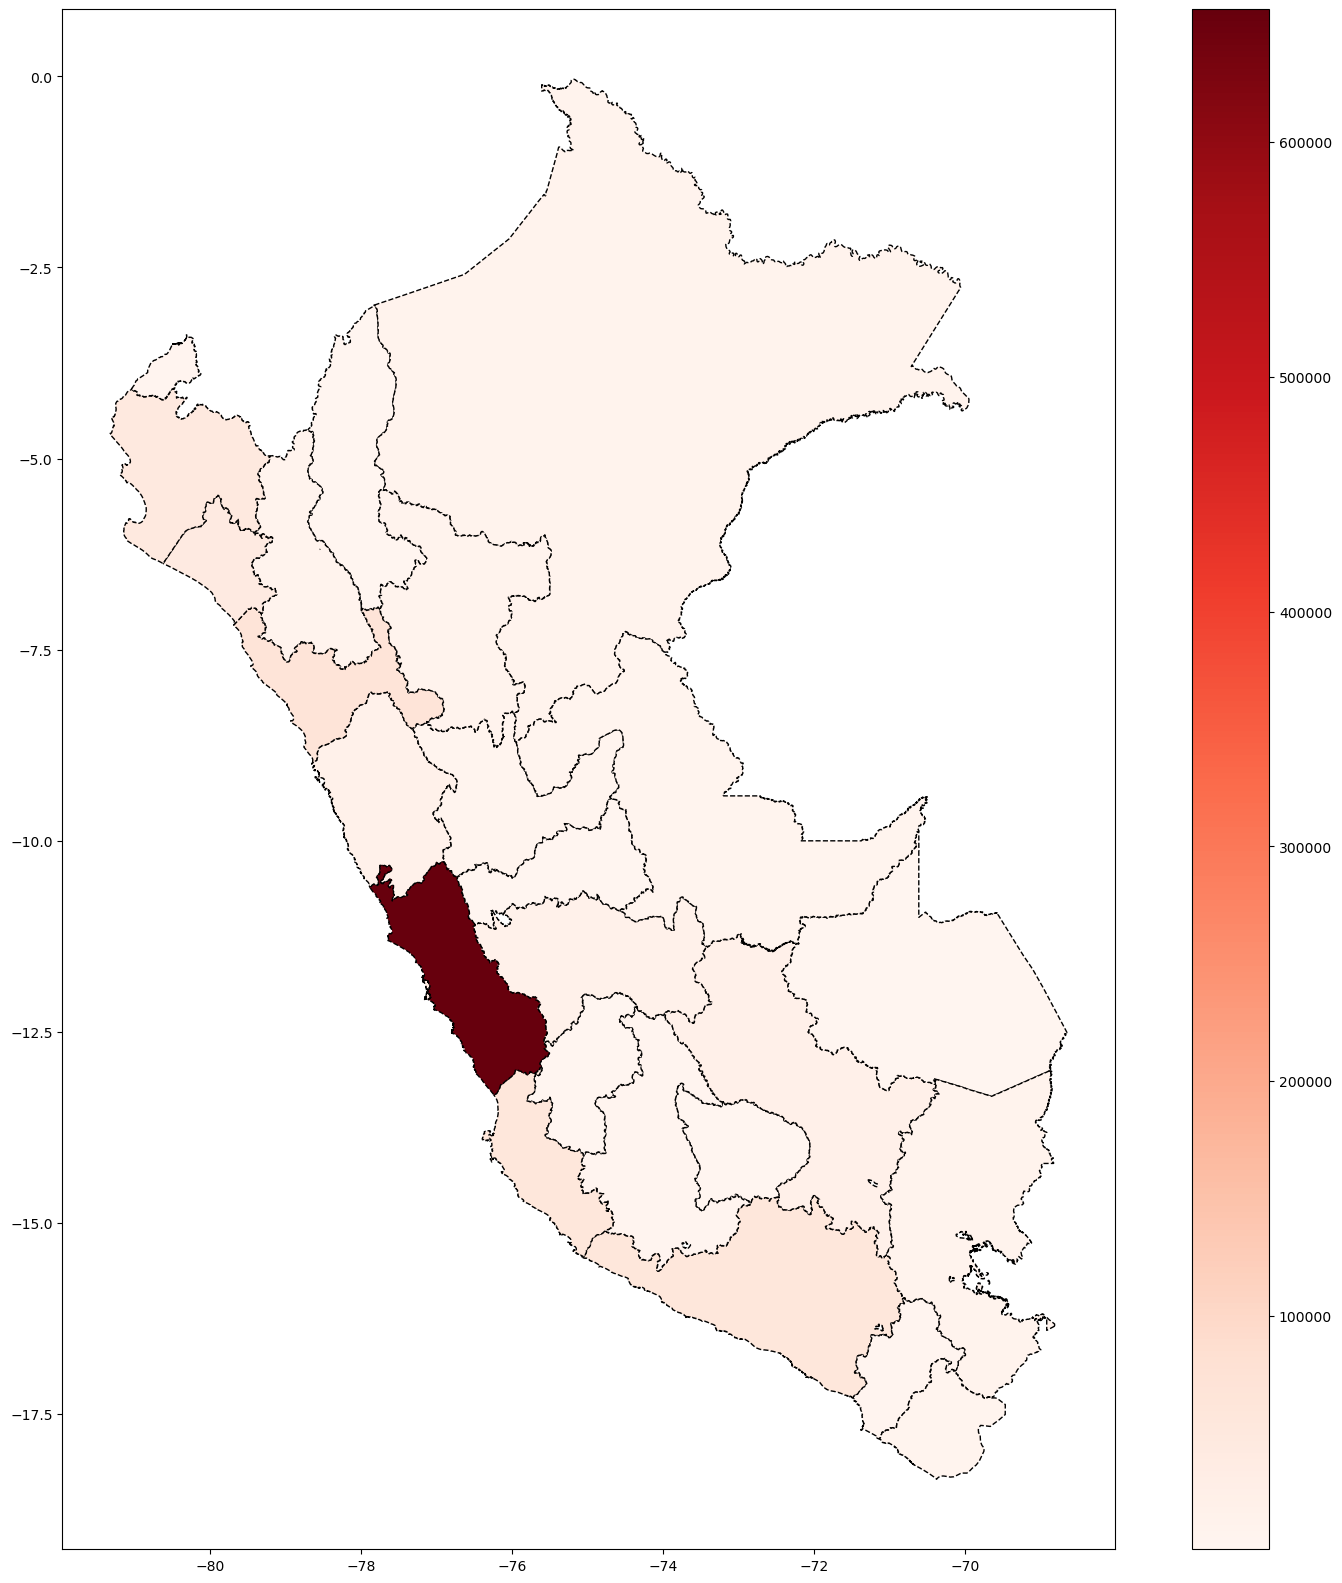

In [15]:
df3.plot( column='women_empl', cmap='Reds', figsize=(20, 20), linestyle='--',
                      edgecolor='black', 
                      legend = True)

In [31]:
#pip install folium

Note: you may need to restart the kernel to use updated packages.


In [17]:
#We set latitud and longitud of Lima
latitud = -12.0757538
longitud = -76.9863174 

# Set zoom
zoom = 5

# We locate Peru in the map
map_1 = fm.Map(location = [latitud, longitud], 
               tiles='cartodbpositron', 
               zoom_start = zoom)

fm.Choropleth( 
    geo_data=df3,
    data=df3,
    columns=["dpt_code","women_empl"],
    key_on="feature.properties.dpt_code",
    fill_color="YlOrRd",
    fill_opacity=0.8,
    line_opacity=0.8,
    smooth_factor=0.2,
    legend_name='Women employers',
    Highlight= True,
    line_color = "#000000",
    overlay=True,
    nan_fill_color = "White"
    ).add_to(map_1)

# Mostrar el mapa
map_1.save('mapa_folium_1.html')


DriverError: C:/Users/LENOVO/Desktop/Github/QLAB_Summer_Python/_data\INEI_LIMITE_DEPARTAMENTAL.shp: No such file or directory

ImportError: The 'mapclassify' package (>= 2.4.0) is required to use the 'scheme' keyword.

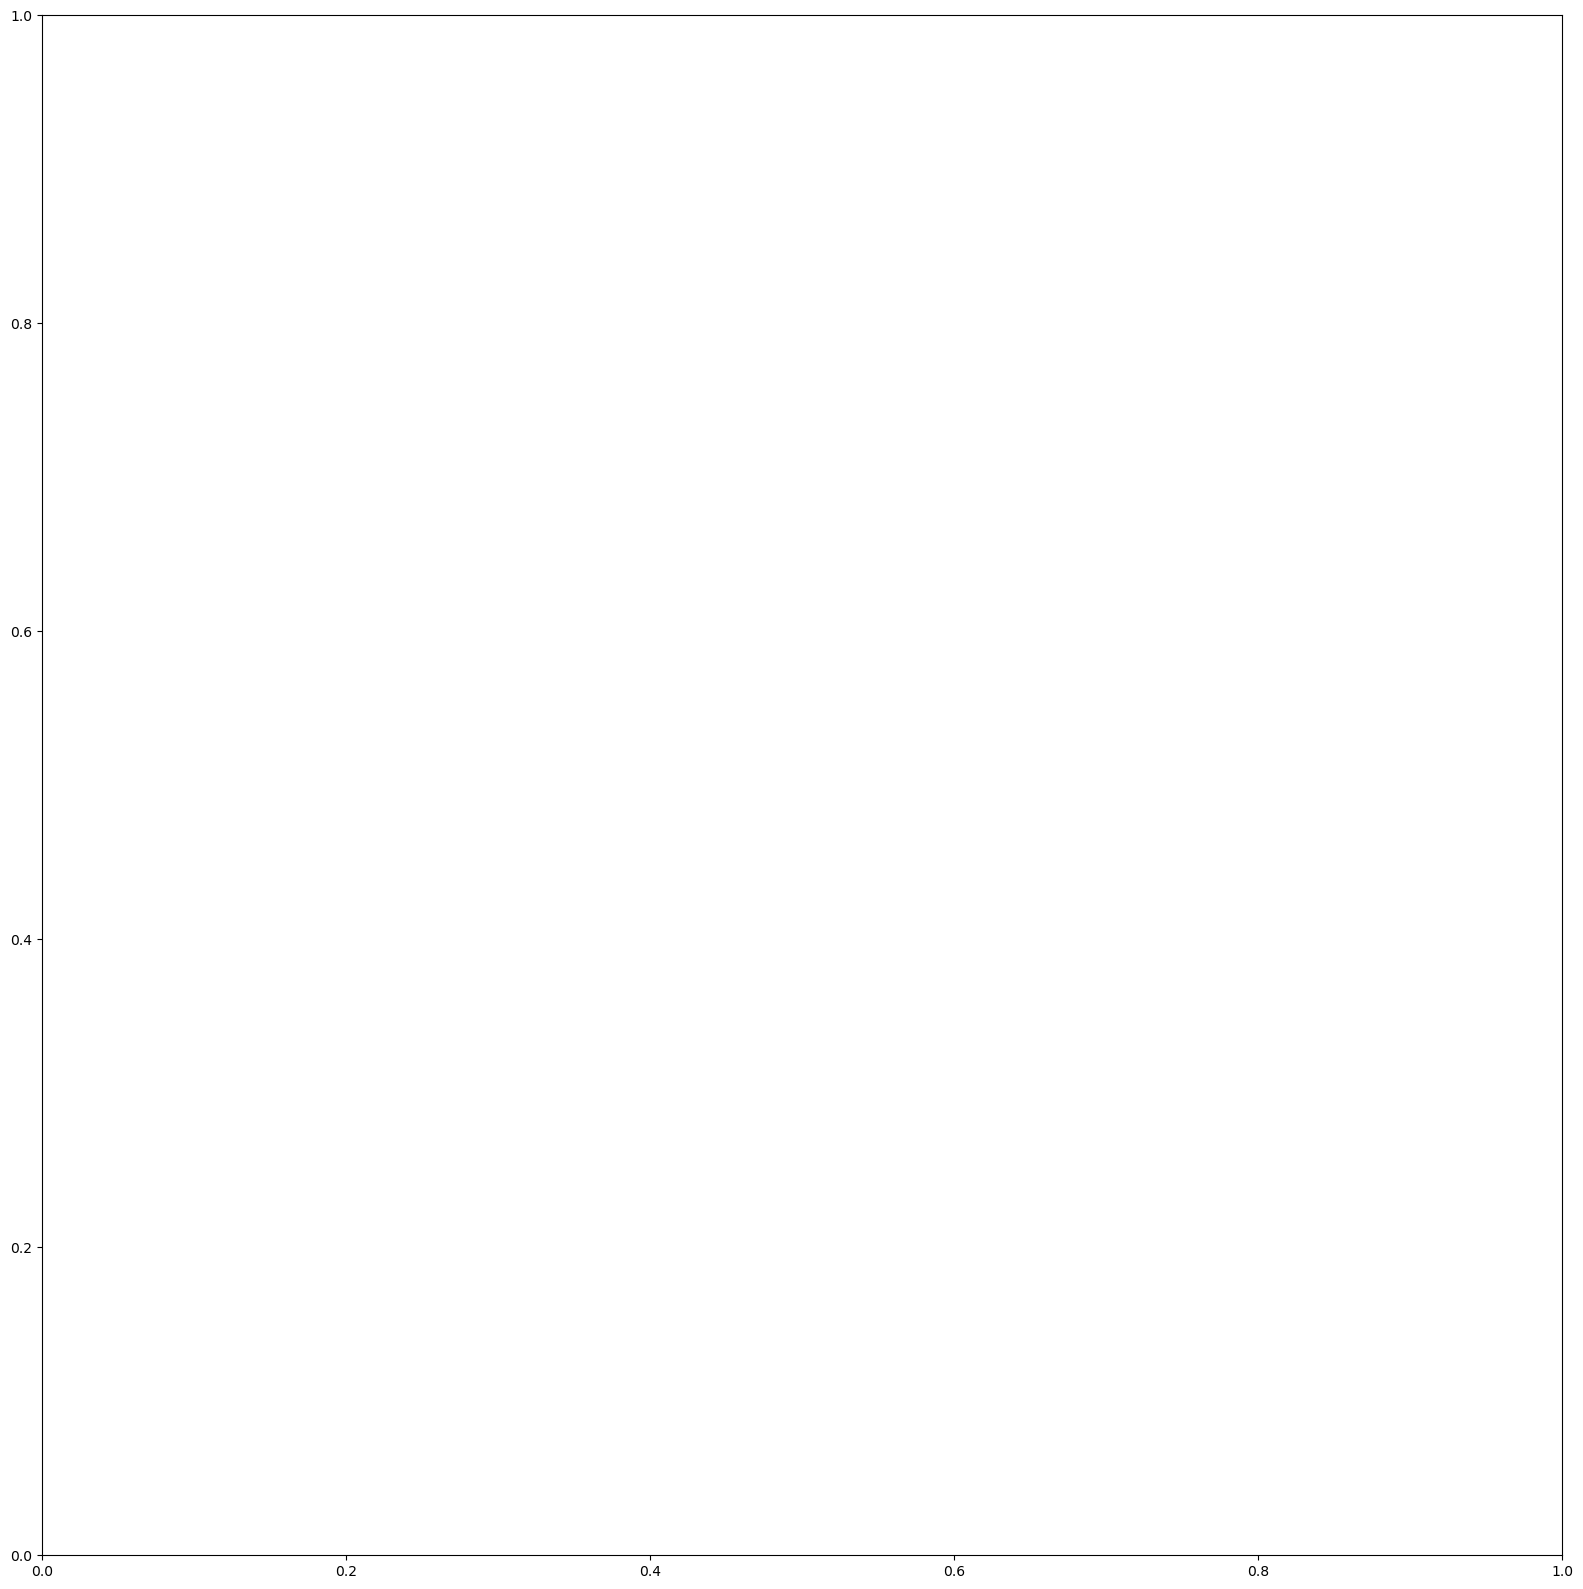

In [18]:
## Graph 2
fig, ax = plt.subplots(figsize=(20, 20))
df3.plot( ax = ax, 
        column='women_empl', 
         cmap= 'Reds', 
         figsize=(20, 20), 
         linestyle='--',
         edgecolor='black', 
         legend = True,  
         scheme = "User_Defined", 
         classification_kwds = dict( bins = [ 20000, 40000, 60000, 100000  ] ), 
         legend_kwds = dict(  loc='upper left',
                            bbox_to_anchor=(1.01, 1),
                            fontsize='x-large',
                            title= "Number of Employers", 
                            title_fontsize = 'x-large', 
                            frameon= False )
        )



In [20]:
# We use bins to separate colors by ranges
map_2 = fm.Map(location = [latitud, longitud], 
               tiles='cartodbpositron', 
               zoom_start = zoom)

bins = [675.33, 20000, 40000, 60000, 100000, 656477.25]  

fm.Choropleth(
    geo_data=df3,
    data=df3,
    columns=["dpt_code", "women_empl"],
    key_on="feature.properties.dpt_code",
    fill_color='YlOrRd',
    fill_opacity=0.8,
    line_opacity=0.8,
    smooth_factor=0.2,
    legend_name='Women employers',
    line_color="#000000",
    bins=bins,  
    nan_fill_color="White",
    highlight=True,
    overlay=True,
    threshold_scale=bins,  
).add_to(map_2)

map_2.save('mapa_folium_2.html')


<Axes: >

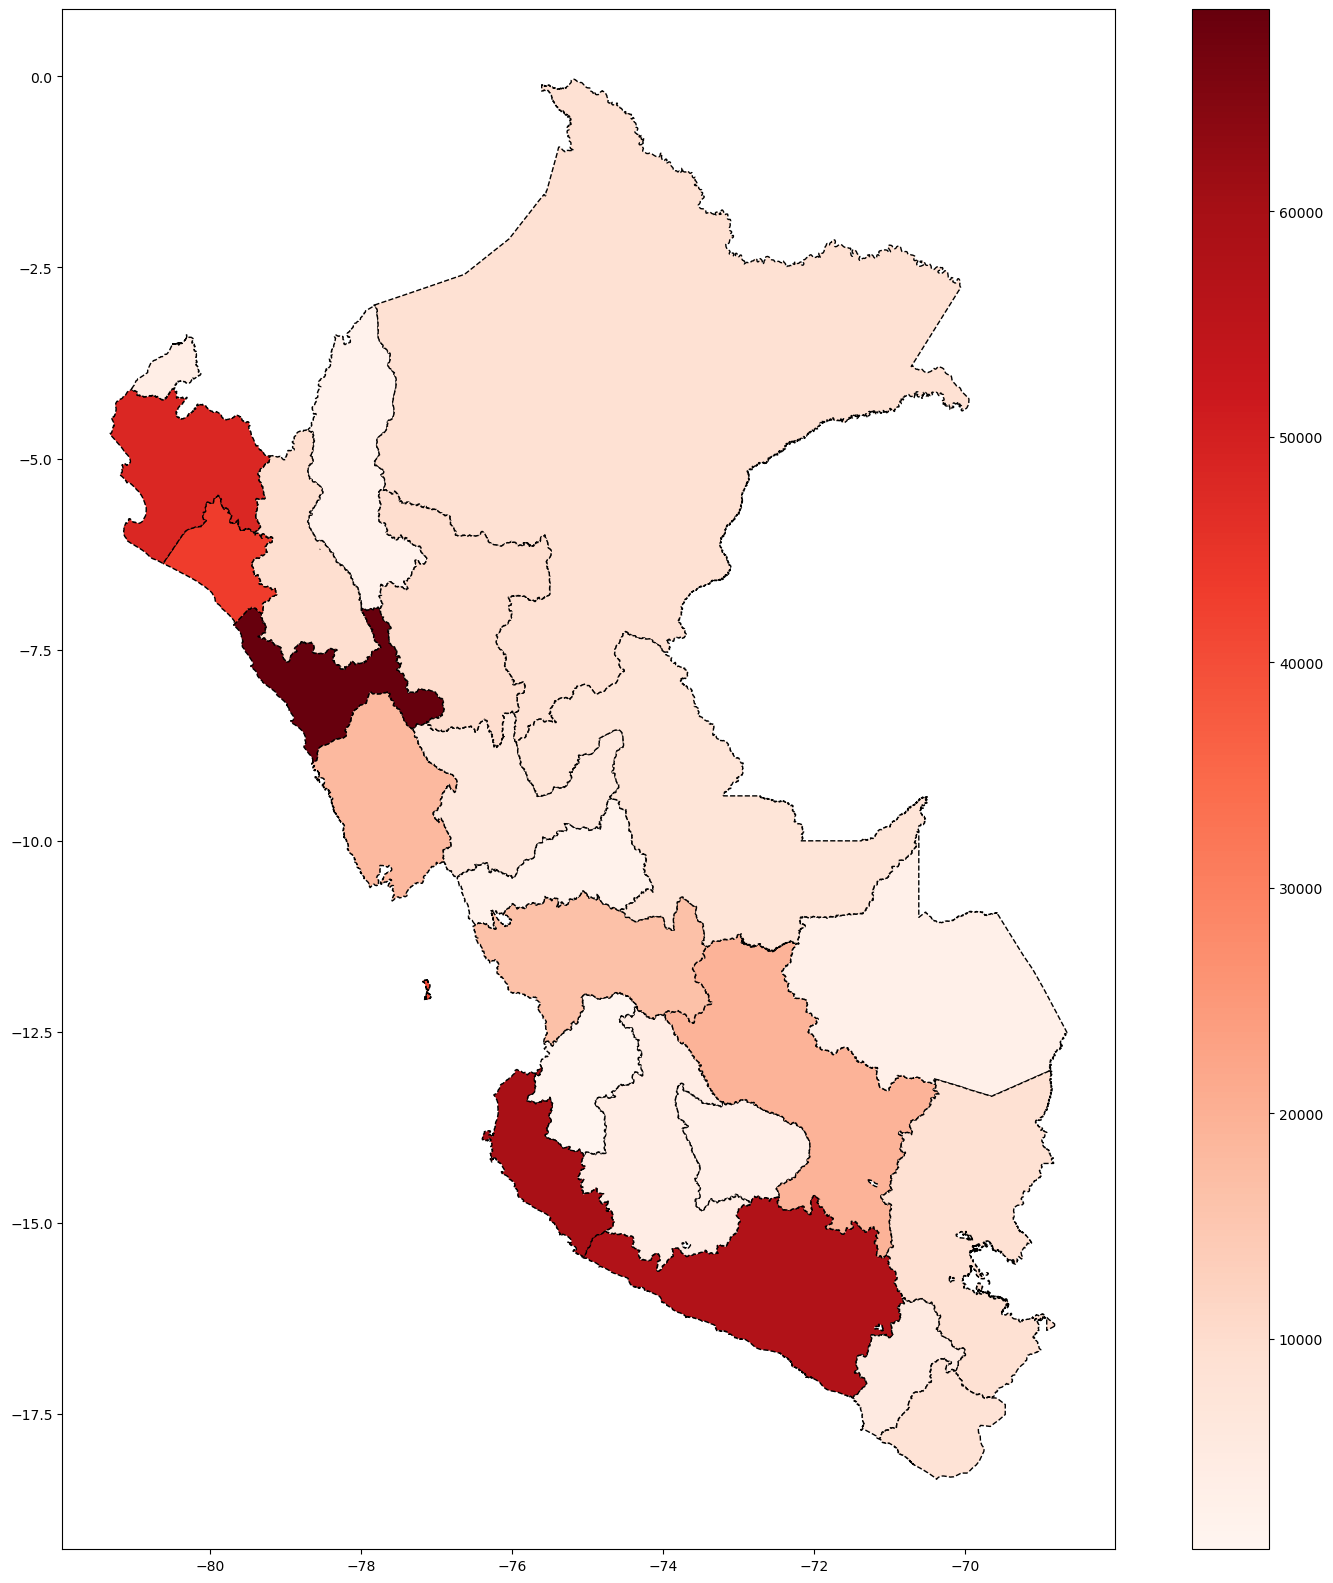

In [21]:
## Graph 3

df3[ df3.CCDD != "15" ].plot( column='women_empl', cmap='Reds', figsize=(20, 20), linestyle='--',
                      edgecolor='black', 
                      legend = True)

In [23]:
# First we take dateset without Lima
df3_no_Lima=df3[ df3.CCDD != "15" ]

map_3 = fm.Map(location = [latitud, longitud], 
               tiles='cartodbpositron', 
               zoom_start = zoom)

bins = [675.33, 20000, 40000, 60000, 100000, 656477.25]  

fm.Choropleth(
    geo_data=df3_no_Lima,
    data=df3_no_Lima,
    columns=["dpt_code", "women_empl"],
    key_on="feature.properties.dpt_code",
    fill_color='YlOrRd',
    fill_opacity=0.8,
    line_opacity=0.8,
    smooth_factor=0.2,
    legend_name='Women employers',
    line_color="#000000",
    bins=bins,  
    nan_fill_color="White",
    highlight=True,
    overlay=True,
    threshold_scale=bins,  
).add_to(map_3)

map_3.save('mapa_folium_3.html')



In [24]:
## Graph 4

df4 = sex_work.groupby( ['dpt_code', 'month', 'sex'], as_index = False )[['empl']].sum() \
        .pivot( index = [ 'dpt_code', 'month' ] , columns = 'sex',values='empl') \
        .reset_index()

In [25]:
df4

sex,dpt_code,month,S.I.,Hombre,Mujer
0,01,January,472,5108,2043
1,01,February,441,4951,2059
2,01,March,423,4459,2056
3,01,April,314,3211,1811
4,01,May,297,3049,1642
...,...,...,...,...,...
295,25,August,1654,16885,7425
296,25,September,1689,17886,7549
297,25,October,1812,19223,7751
298,25,November,1882,19758,7933


In [26]:
import geopandas as gpd
from geopandas import GeoSeries
from shapely.geometry import Point, LineString
import branca as br

In [27]:
## Graph 5

df4[ 'prop_wom' ] = ( df4.Mujer * 100 / df4.Hombre )

In [28]:
df5 = dpt_shp.merge( df4, left_on = 'CCDD', right_on = 'dpt_code'  )

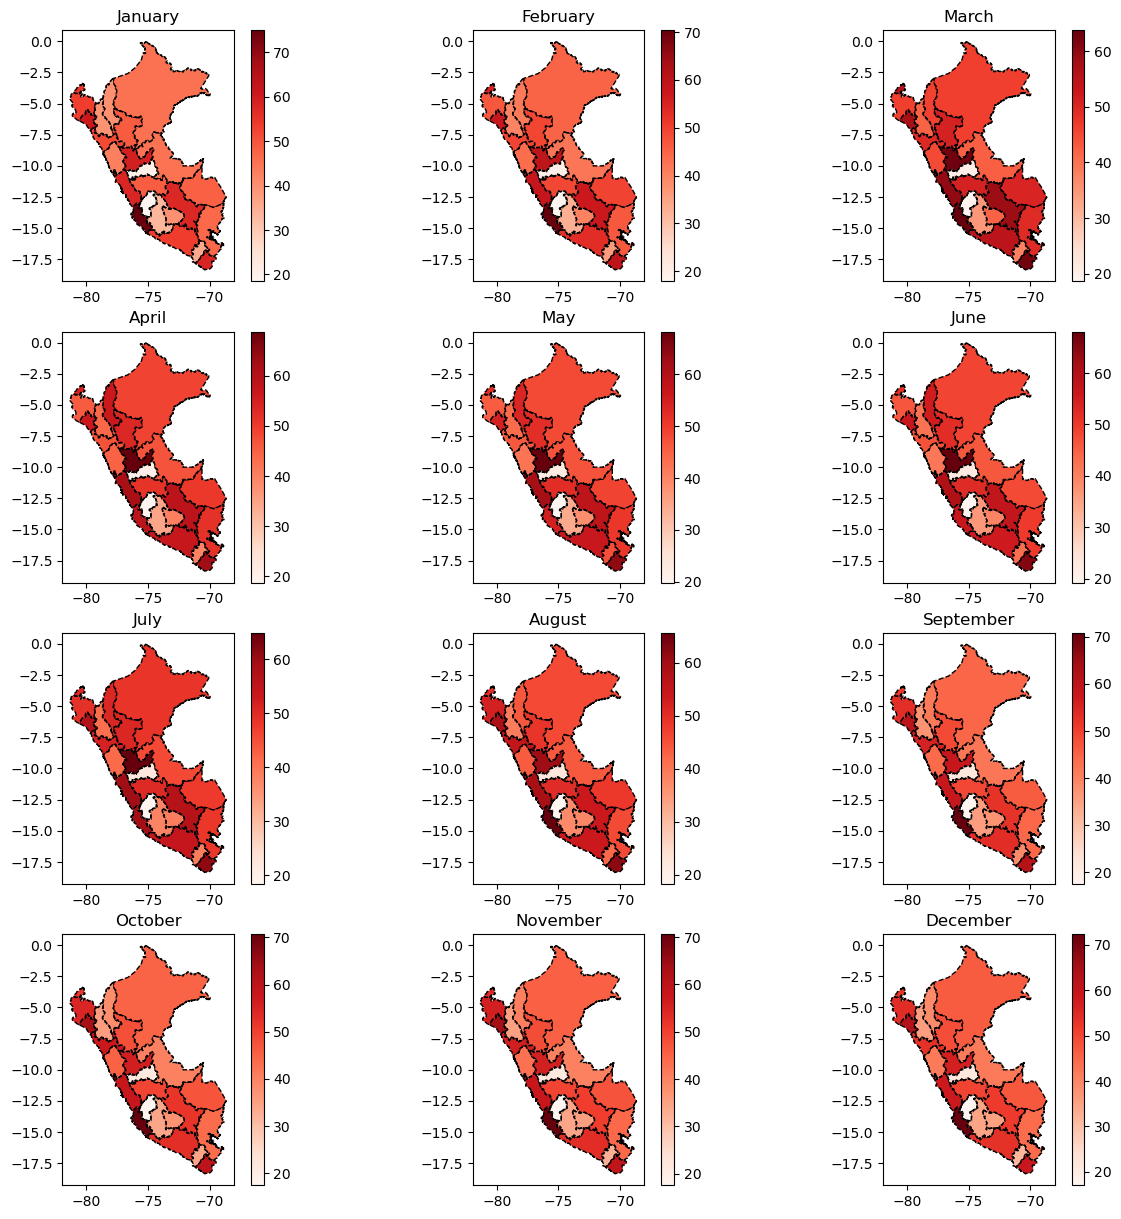

In [29]:
fig, axis = plt.subplots( nrows = 4, ncols= 3, figsize = ( 15, 15 ) )

idx = 0
for i in range( 4 ):
    for j in range ( 3 ):
        
        
        ax = axis[ i ][ j ]
        
        month = df5.month.unique()[ idx ]
        
        df6 = df5[ df5.month == month ]
        
        df6.plot( column='prop_wom', 
                  cmap='Reds', 
                  linestyle='--',
                  edgecolor='black', 
                  legend = True, 
                  ax = ax 
                )
        
        ax.set_title( month )
        
        idx = idx + 1

In [74]:
## Graph 6

from textwrap import wrap

In [75]:
# Inverting colour map
cmap = plt.cm.OrRd

<AxesSubplot:>

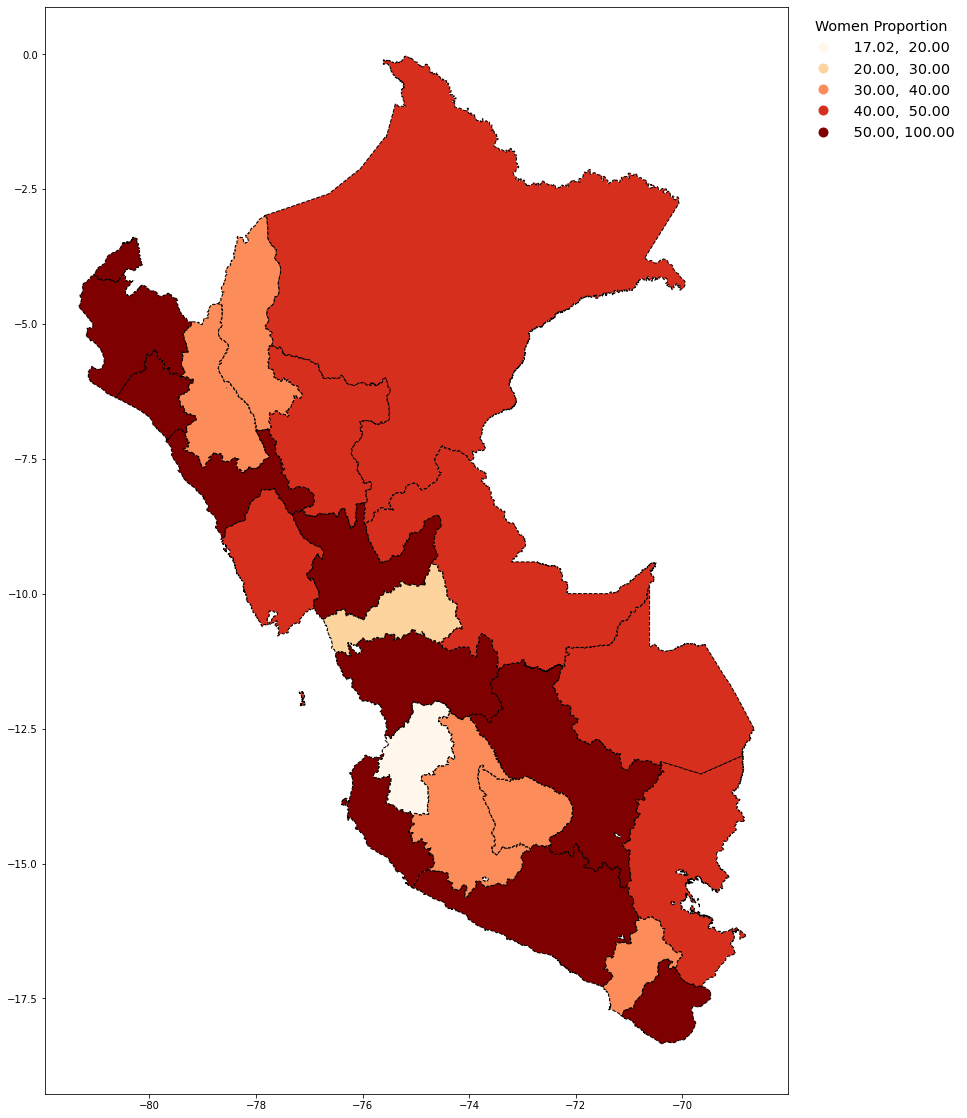

In [76]:
fig, ax = plt.subplots(figsize=(20, 20))
df6.plot( ax = ax, 
        column='prop_wom', 
         cmap= cmap, 
         figsize=(20, 20), 
         linestyle='--',
         edgecolor='black', 
         legend = True,  
         scheme = "User_Defined", 
         classification_kwds = dict( bins = [ 20, 30, 40, 50,  100 ] ), 
         legend_kwds=dict(  loc='upper left',
                            bbox_to_anchor=(1.01, 1),
                            fontsize='x-large',
                            title= "Women Proportion", 
                            title_fontsize = 'x-large', 
                            frameon= False )
        )


In [77]:
## Graph 7

df6.loc[ (df6.NOMBDEP == 'LIMA'), 'prop_wom' ] = np.nan

<AxesSubplot:>

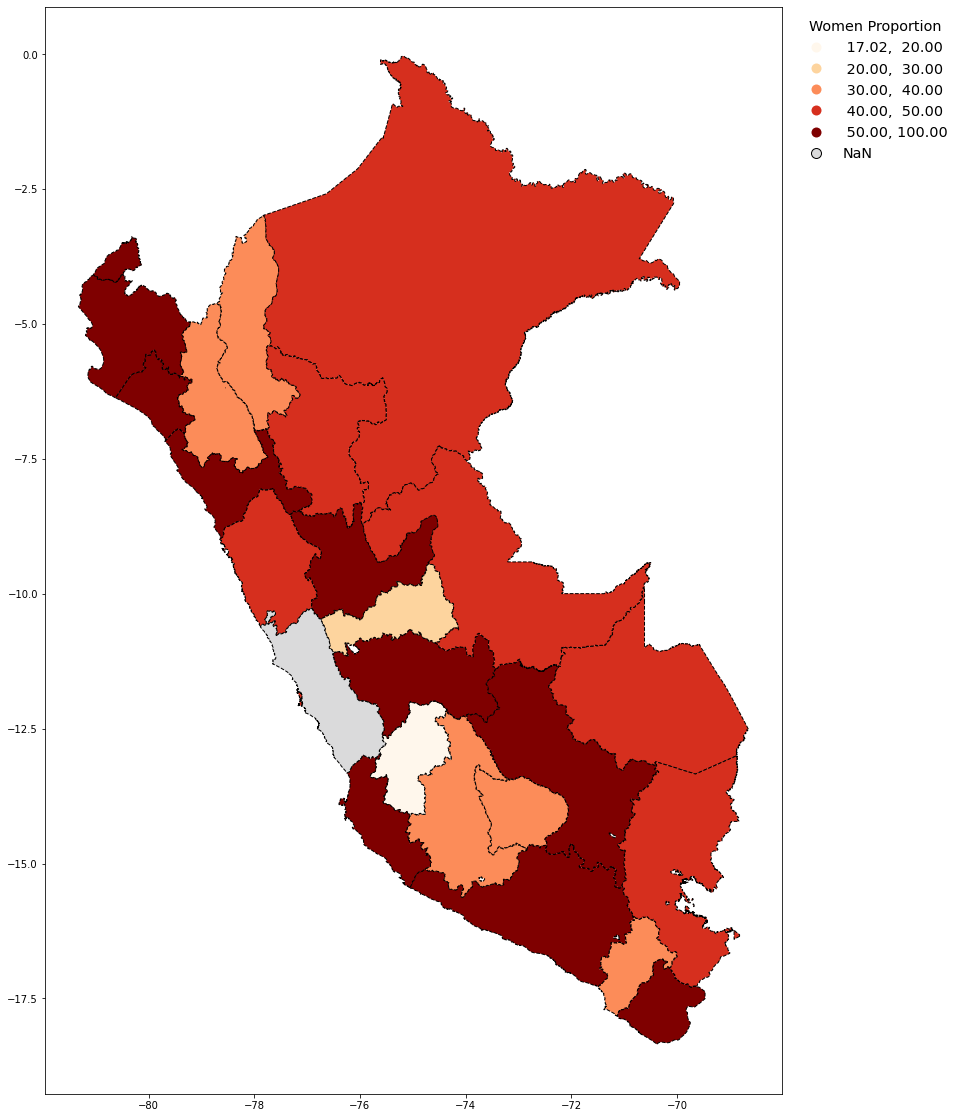

In [20]:
fig, ax = plt.subplots(figsize=(20, 20))
df6.plot( ax = ax, 
        column='prop_wom', 
         cmap= cmap, 
         figsize=(20, 20), 
         linestyle='--',
         edgecolor='black', 
         legend = True,  
         scheme = "User_Defined", 
         missing_kwds= dict(color = "#DADADB",), 
         classification_kwds = dict( bins = [ 20, 30, 40, 50,  100 ] ), 
         legend_kwds=dict(  loc='upper left',
                            bbox_to_anchor=(1.01, 1),
                            fontsize='x-large',
                            title= "Women Proportion", 
                            title_fontsize = 'x-large', 
                            frameon= False )
        )

<AxesSubplot:>

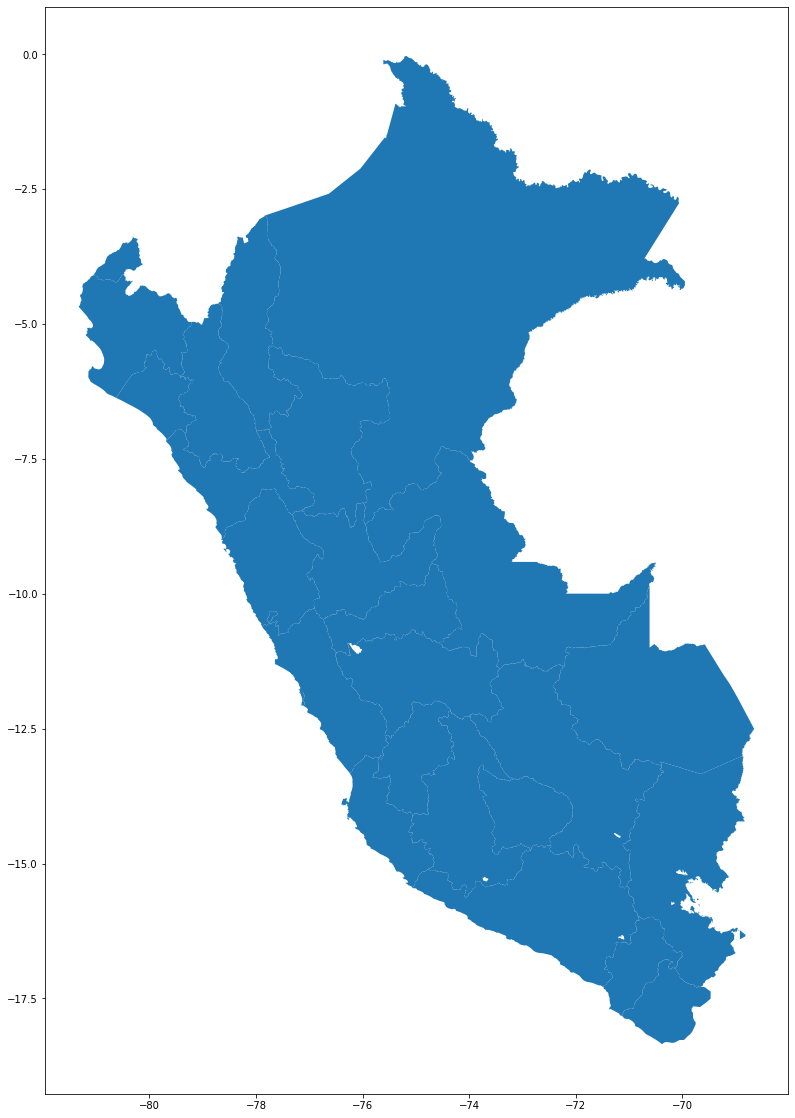

In [21]:
## Graph 8

fig, ax = plt.subplots(figsize=(20, 20))
dpt_shp.plot( ax = ax )

In [22]:
## Graph 9

dpt_shp['country'] = 'PERU'

In [23]:
ctr_shp = dpt_shp.dissolve( by = 'country')

<AxesSubplot:>

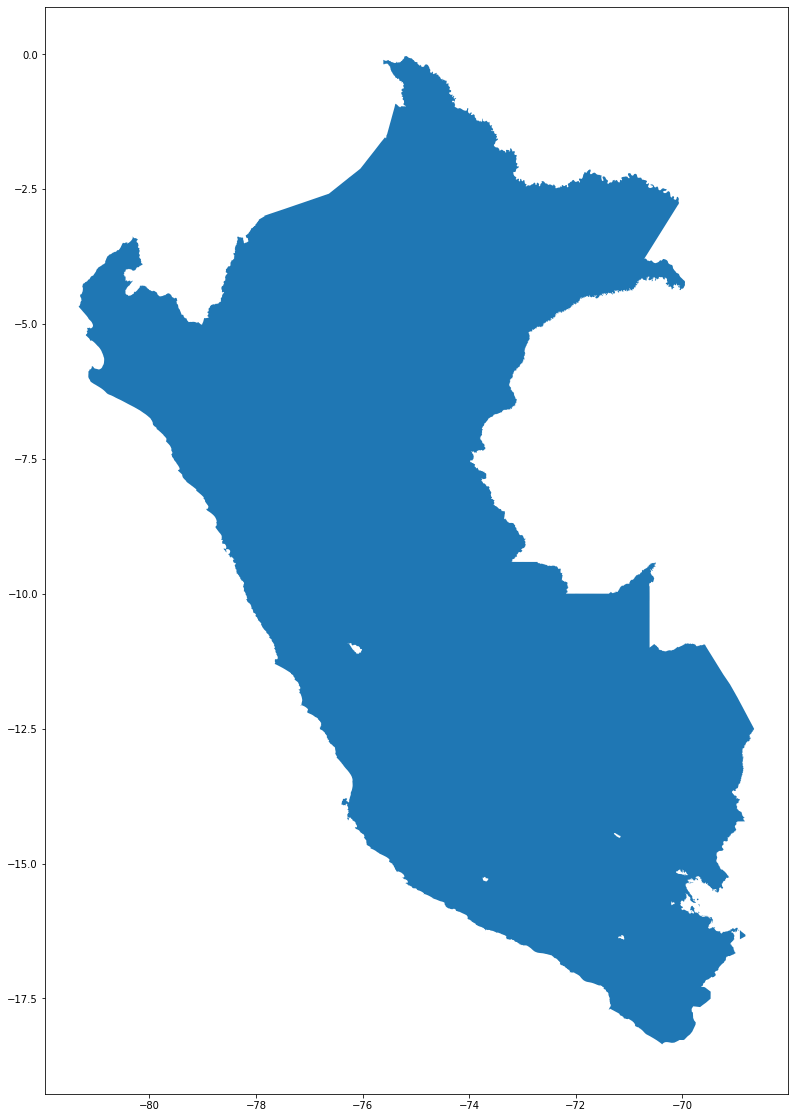

In [24]:
fig, ax = plt.subplots(figsize=(20, 20))
ctr_shp.plot( ax = ax )

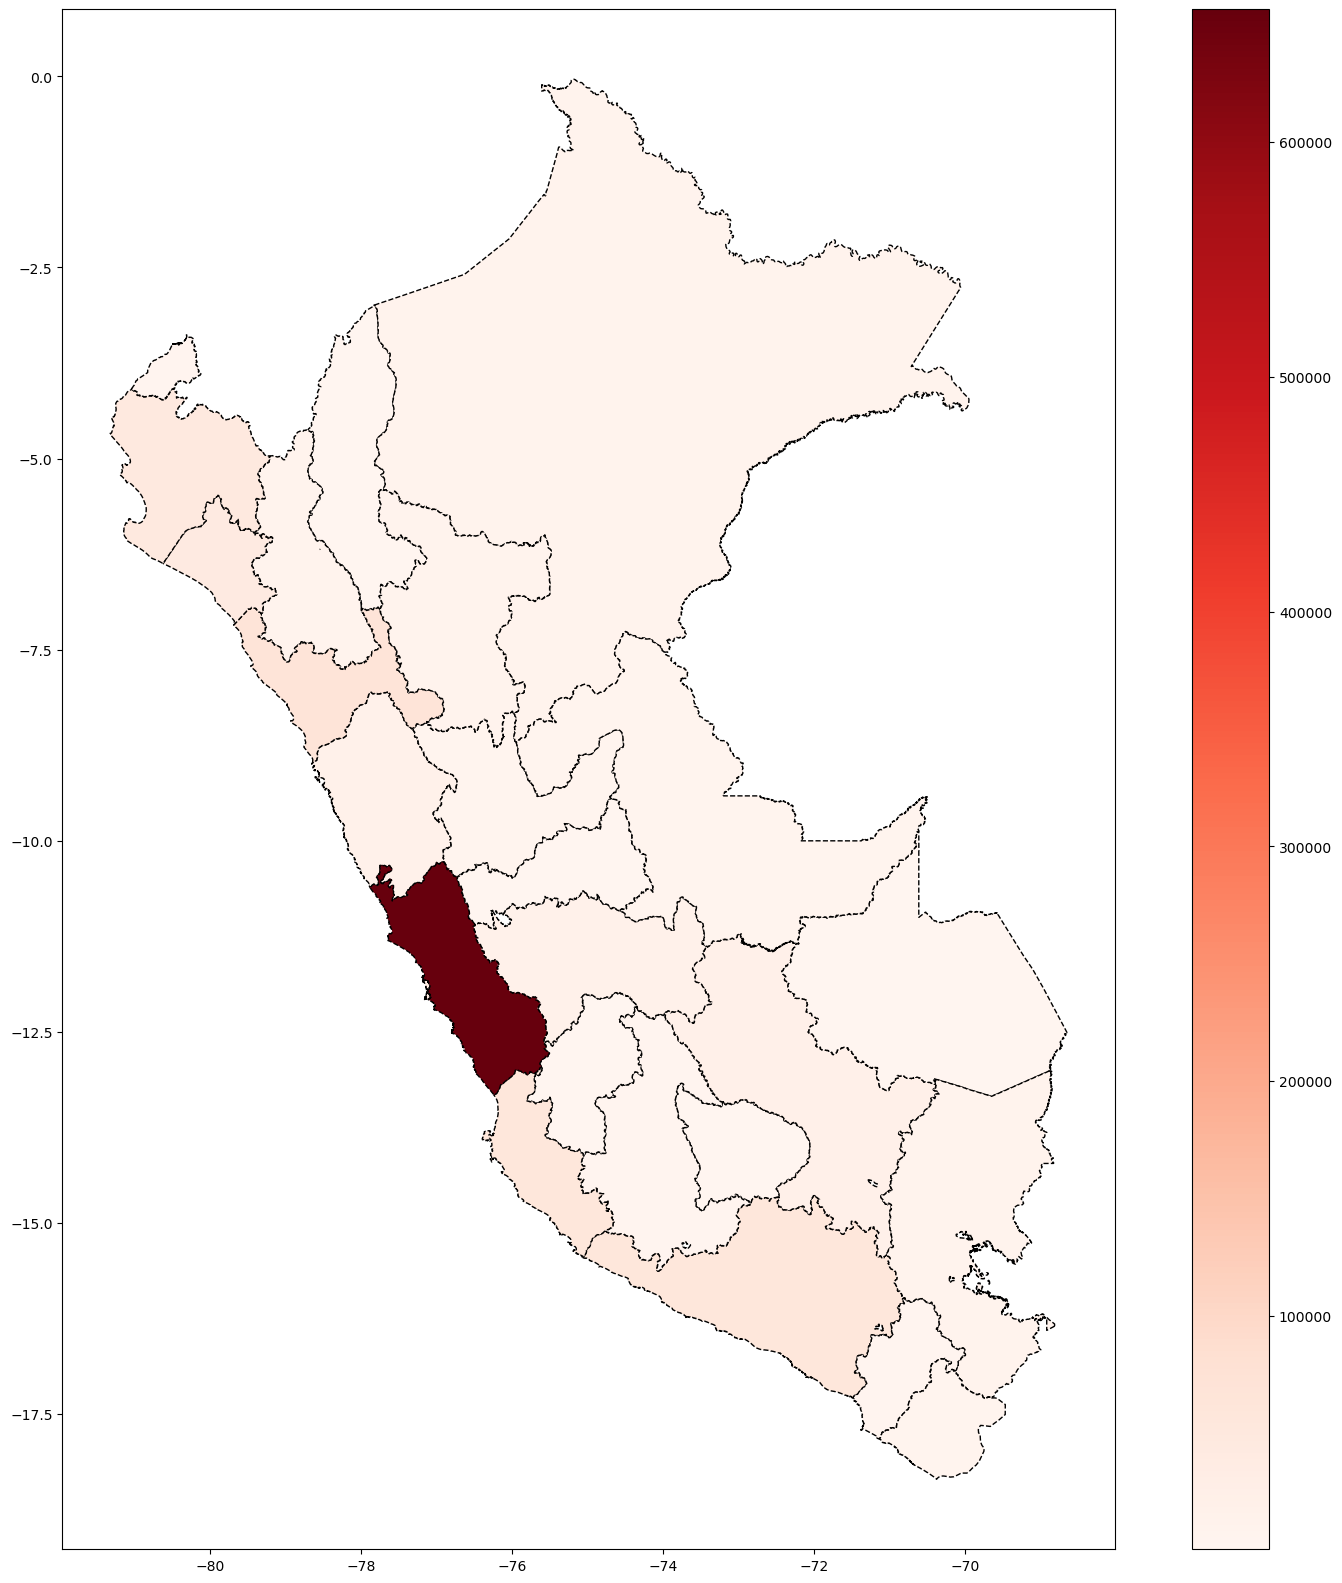

In [1]:
## MAP 1
from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }a
</style>
"""))
import matplotlib.pyplot as plt 

import numpy as np
import pandas as pd
import geopandas as gpd

# Get data of labor
sex_work = pd.read_stata( r'C:\Users\Hp\Documents\GitHub\QLAB_Summer_Python\_data\8_trab_sex_20.dta')
sex_work[ 'dpt_code' ] = sex_work.cod_ubigeo.str[ :2 ].copy()
sex_work[ 'prov_code' ] = sex_work.cod_ubigeo.str[ :4 ].copy()

# Sex work
women_work = sex_work[ sex_work.sex == 'Mujer' ].copy().reset_index( drop = True )

# get data from lima
women_work[ 'month' ] = pd.to_datetime( women_work.month , format = '%B' ) \
                                    .dt.strftime( '%m' ) \
                                    .astype( int )

# Sort by department and month
women_work.sort_values([ 'dpt_code', 'month'], inplace = True )

# Get the total number of women workers by dpt
dpt_women_work = women_work.groupby( [ 'dpt_code', 'month'], as_index = False )[['empl']] \
                            .sum() \
                            .rename( columns = {'empl' :'women_empl'})

# Sort by dpt code and month
dpt_women_work.sort_values([ 'dpt_code', 'month'], inplace = True )

df2 = dpt_women_work.groupby( ['dpt_code'],as_index = False )[['women_empl']].mean()

#SHAPEFILE:
dpt_shp = gpd.read_file( r'C:\Users\Hp\Documents\GitHub\QLAB_Summer_Python\_data\INEI_LIMITE_DEPARTAMENTAL\INEI_LIMITE_DEPARTAMENTAL.shp' )
df3 = dpt_shp.merge( df2, left_on = 'CCDD', right_on = 'dpt_code'  )
df3.plot( column='women_empl', cmap='Reds', figsize=(20, 20), linestyle='--',
                      edgecolor='black', 
                      legend = True)


import folium
from folium import Choropleth

# Convert GeoDataFrame to GeoJSON
df3_geojson = df3[['dpt_code', 'women_empl', 'geometry']].to_json()

# Create a Map instance
m = folium.Map(location=[-9.1900, -75.0152], zoom_start=6)  # Coordinates for Peru

# Create a Choropleth layer and add it to the map
Choropleth(
    geo_data=df3_geojson,
    name='choropleth',
    data=df3,
    columns=['dpt_code', 'women_empl'],
    key_on='feature.properties.dpt_code',
    fill_color='Reds',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Number of Employers',
    
).add_to(m)

from folium import IFrame

# Create an IFrame to embed the map
iframe = IFrame("folium_map.html", width=900, height=600)

# Display the map in the notebook
display(folium.Map(location=[-9.1900, -75.0152], zoom_start=6).add_child(folium.Marker(location=[-9.1900, -75.0152], popup=folium.Popup(iframe))))

classification_kwds=dict(bins=[20000, 40000, 60000, 100000])


SystemError: initialization of _internal failed without raising an exception

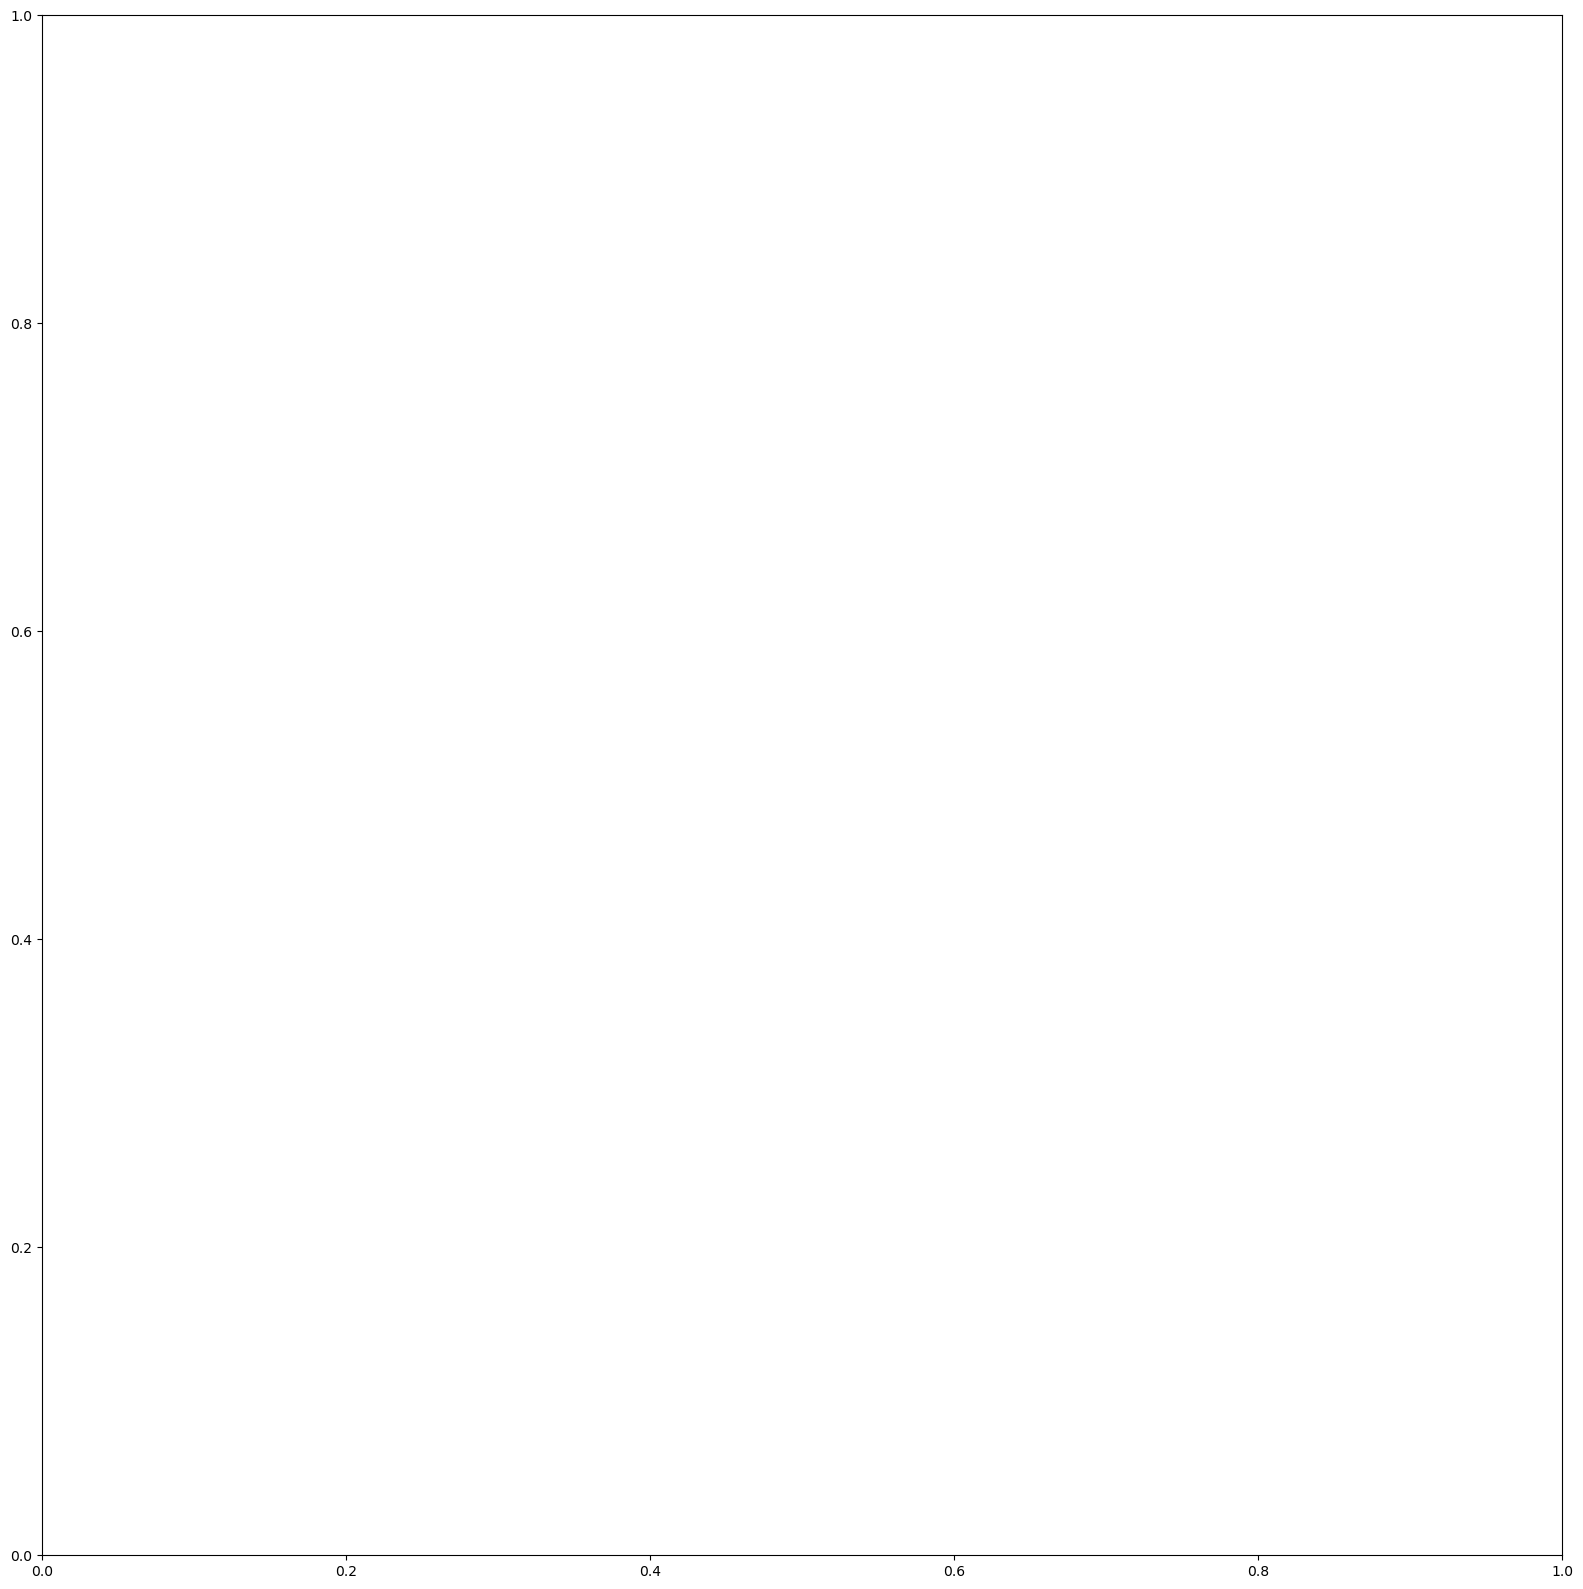

In [122]:
## MAP 2
fig, ax = plt.subplots(figsize=(20, 20))
df3.plot( ax = ax, 
        column='women_empl', 
         cmap= 'Reds', 
         figsize=(20, 20), 
         linestyle='--',
         edgecolor='black', 
         legend = True,  
         scheme = "User_Defined", 
         classification_kwds = dict( bins = [ 20000, 40000, 60000, 100000  ] ), 
         legend_kwds = dict(  loc='upper left',
                            bbox_to_anchor=(1.01, 1),
                            fontsize='x-large',
                            title= "Number of Employers", 
                            title_fontsize = 'x-large', 
                            frameon= False )
        )
import folium
from folium import Choropleth
from folium.plugins import MarkerCluster

# Convert GeoDataFrame to GeoJSON
df3_geojson = df3[['dpt_code', 'women_empl', 'geometry']].to_json()

# Create a Map instance
m = folium.Map(location=[-9.1900, -75.0152], zoom_start=6)  # Coordinates for Peru

# Create a Choropleth layer and add it to the map
Choropleth(
    geo_data=df3_geojson,
    name='choropleth',
    data=df3,
    columns=['dpt_code', 'women_empl'],
    key_on='feature.properties.dpt_code',
    fill_color='Reds',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Number of Employers',
    bins=[20000, 40000, 60000, 100000]
).add_to(m)

# Create a MarkerCluster layer for additional information if needed
marker_cluster = MarkerCluster().add_to(m)

# Add markers or other information to the MarkerCluster layer
# For example, add a popup for each department with the number of employers
for idx, row in df3.iterrows():
    popup_text = f"Department: {row['dpt_code']}<br>Employers: {row['women_empl']}"
    folium.Marker([row['geometry'].centroid.y, row['geometry'].centroid.x], popup=popup_text).add_to(marker_cluster)

# Save the map to an HTML file
m.save("folium_map.html")

# Display the map in the notebook
m



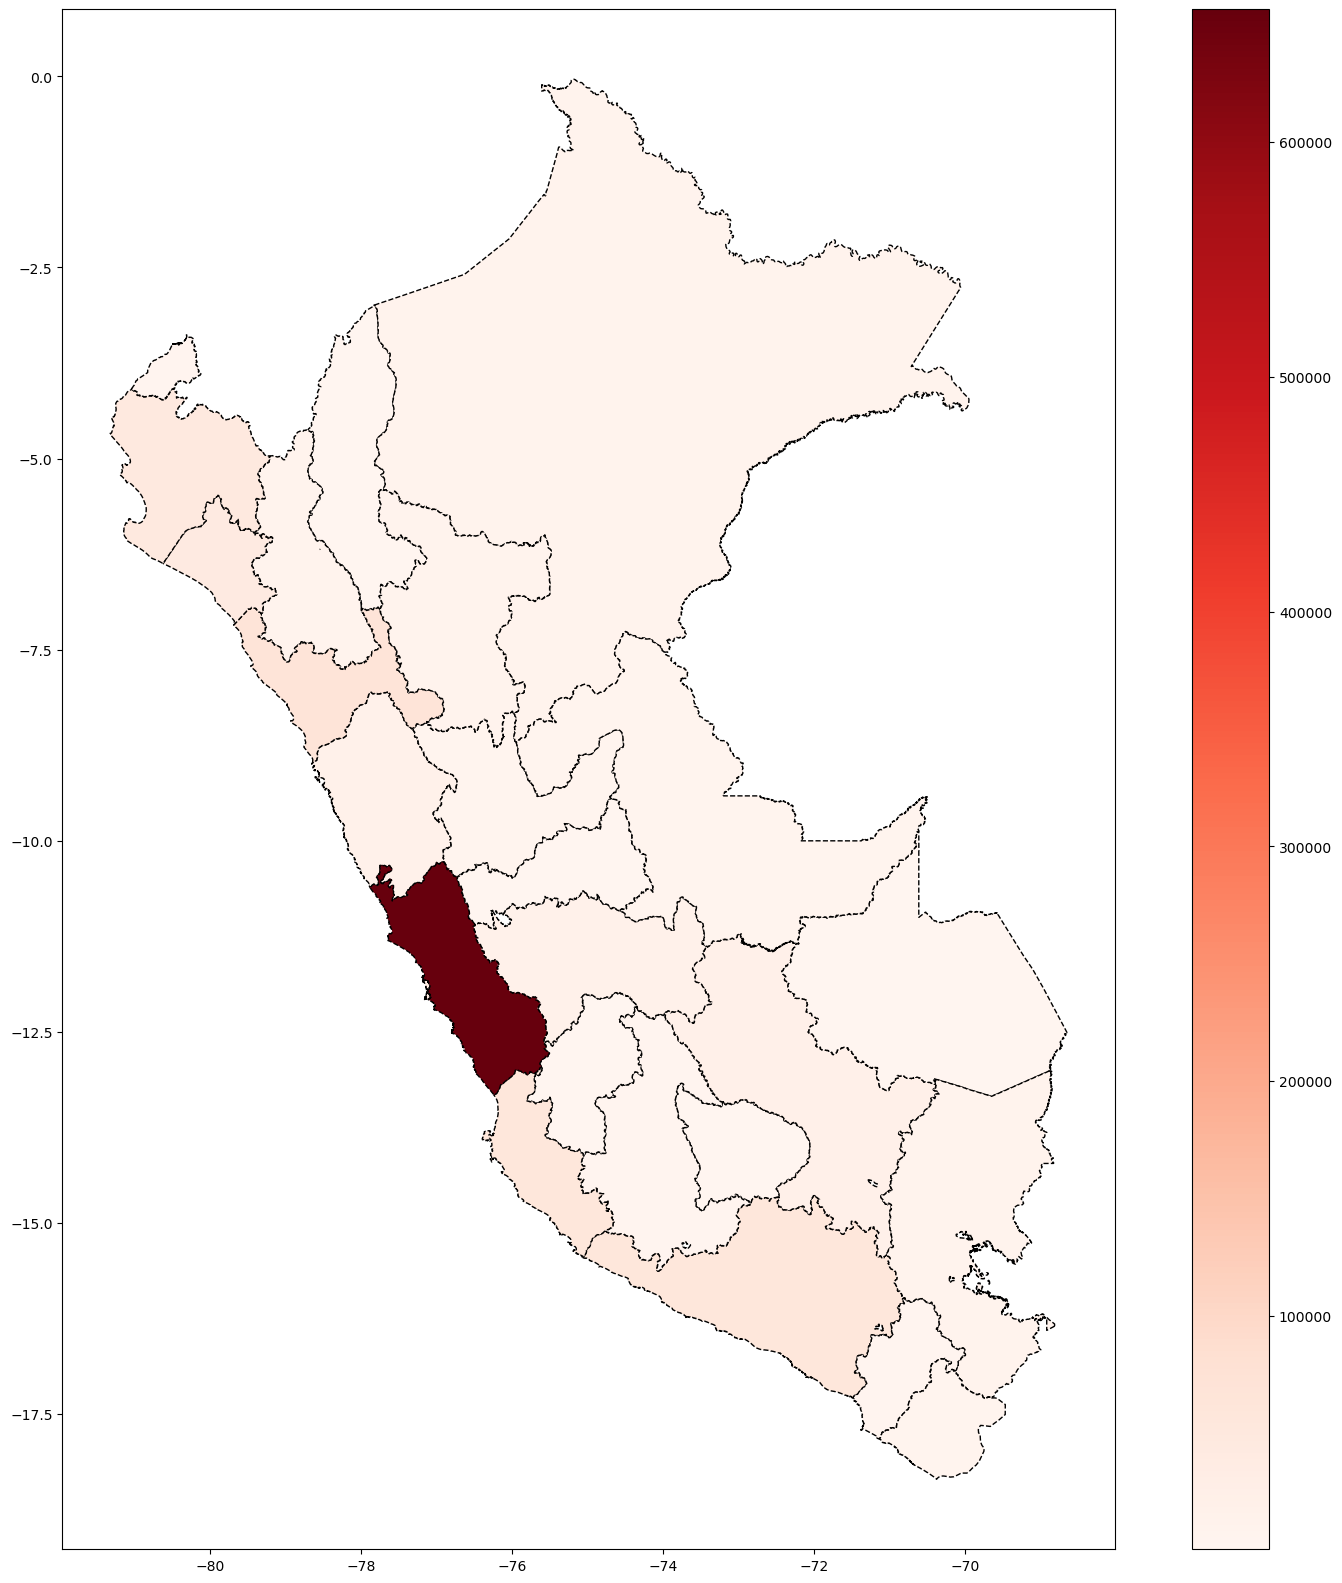

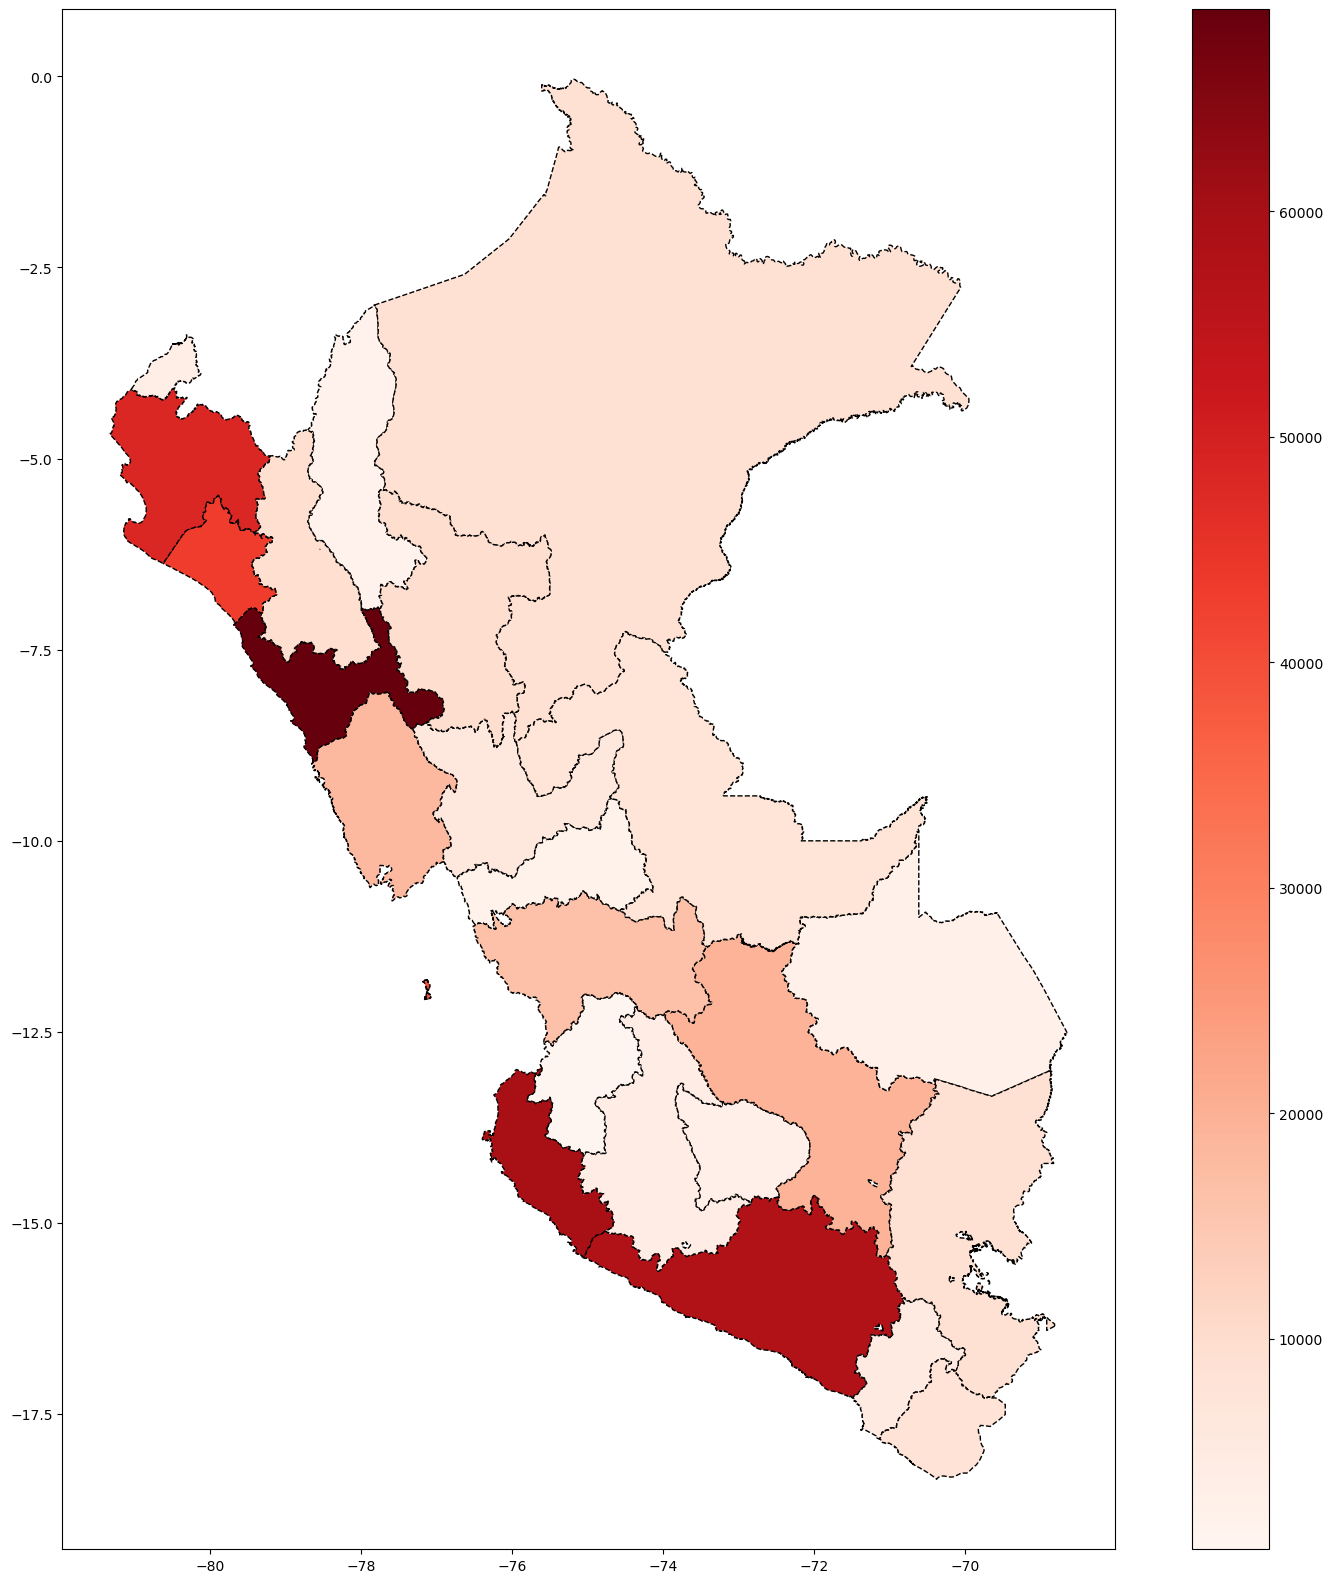

In [39]:
#QUITAR LIMA MAP #3
from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }a
</style>
"""))
import matplotlib.pyplot as plt 

import numpy as np
import pandas as pd
import geopandas as gpd

# Get data of labor
sex_work = pd.read_stata( r'C:\Users\Hp\Documents\GitHub\QLAB_Summer_Python\_data\8_trab_sex_20.dta')
sex_work[ 'dpt_code' ] = sex_work.cod_ubigeo.str[ :2 ].copy()
sex_work[ 'prov_code' ] = sex_work.cod_ubigeo.str[ :4 ].copy()

# Sex work
women_work = sex_work[ sex_work.sex == 'Mujer' ].copy().reset_index( drop = True )

# get data from lima
women_work[ 'month' ] = pd.to_datetime( women_work.month , format = '%B' ) \
                                    .dt.strftime( '%m' ) \
                                    .astype( int )

# Sort by department and month
women_work.sort_values([ 'dpt_code', 'month'], inplace = True )

# Get the total number of women workers by dpt
dpt_women_work = women_work.groupby( [ 'dpt_code', 'month'], as_index = False )[['empl']] \
                            .sum() \
                            .rename( columns = {'empl' :'women_empl'})

# Sort by dpt code and month
dpt_women_work.sort_values([ 'dpt_code', 'month'], inplace = True )

df2 = dpt_women_work.groupby( ['dpt_code'],as_index = False )[['women_empl']].mean()

#SHAPEFILE:
dpt_shp = gpd.read_file( r'C:\Users\Hp\Documents\GitHub\QLAB_Summer_Python\_data\INEI_LIMITE_DEPARTAMENTAL\INEI_LIMITE_DEPARTAMENTAL.shp' )
df3 = dpt_shp.merge( df2, left_on = 'CCDD', right_on = 'dpt_code'  )
df3.plot( column='women_empl', cmap='Reds', figsize=(20, 20), linestyle='--',
                      edgecolor='black', 
                      legend = True)
df3[ df3.CCDD != "15" ].plot( column='women_empl', cmap='Reds', figsize=(20, 20), linestyle='--',
                      edgecolor='black', 
                      legend = True)

import folium
from folium import Choropleth

# Convert GeoDataFrame to GeoJSON
df3_geojson = df3[['dpt_code', 'women_empl', 'geometry']].to_json()

# Create a Map instance
m = folium.Map(location=[-9.1900, -75.0152], zoom_start=6)  # Coordinates for Peru

# Create a Choropleth layer and add it to the map
Choropleth(
    geo_data=df3_geojson,
    name='choropleth',
    data=df3,
    columns=['dpt_code', 'women_empl'],
    key_on='feature.properties.dpt_code',
    fill_color='Reds',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Number of Employers',
).add_to(m)

# Save the map as an HTML file
m.save("folium_map.html")

In [ ]:
##MAP 4
df4 = sex_work.groupby( ['dpt_code', 'month', 'sex'], as_index = False )[['empl']].sum() \
        .pivot( index = [ 'dpt_code', 'month' ] , columns = 'sex',values='empl') \
        .reset_index()
df4[ 'prop_wom' ] = ( df4.Mujer * 100 / df4.Hombre )
df5 = dpt_shp.merge( df4, left_on = 'CCDD', right_on = 'dpt_code'  )
fig, axis = plt.subplots( nrows = 4, ncols= 3, figsize = ( 15, 15 ) )

idx = 0
for i in range( 4 ):
    for j in range ( 3 ):
        
        
        ax = axis[ i ][ j ]
        
        month = df5.month.unique()[ idx ]
        
        df6 = df5[ df5.month == month ]
        
        df6.plot( column='prop_wom', 
                  cmap='Reds', 
                  linestyle='--',
                  edgecolor='black', 
                  legend = True, 
                  ax = ax 
                )
        
        ax.set_title( month )
        
        idx = idx + 1

import folium
from folium import Choropleth
from folium.plugins import MarkerCluster

# Convert GeoDataFrame to GeoJSON
df5_geojson = df5[['dpt_code', 'prop_wom', 'geometry']].to_json()

# Create a Map instance
m = folium.Map(location=[-9.1900, -75.0152], zoom_start=6)  # Coordinates for Peru

# Iterate over unique months and create Choropleth layers for each
for month in df5.month.unique():
    # Filter data for the specific month
    df6 = df5[df5.month == month]

    # Create a Choropleth layer and add it to the map
    Choropleth(
        geo_data=df5_geojson,
        name=f'choropleth_{month}',
        data=df6,
        columns=['dpt_code', 'prop_wom'],
        key_on='feature.properties.dpt_code',
        fill_color='Reds',
        fill_opacity=0.7,
        line_opacity=0.2,
        legend_name=f'Proportion of Women in {month}',
    ).add_to(m)

# Save the map to an HTML file
m.save("folium_map_monthly.html")

# Display the map in the notebook
m
